In [92]:
import tweepy
import TwitterCredentials as keys
import pandas as pd

auth = tweepy.OAuthHandler(keys.consumer_API_key, keys.consumer_API_secret_key)
auth.set_access_token(keys.access_token, keys.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

screen_name = "wsj"
#initialize a list to hold all the tweepy Tweets
alltweets = []  
    
#make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
#save most recent tweets
alltweets.extend(new_tweets)
    
#save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1

#keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    print(f"getting tweets before {oldest}")
        
    #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
    #save most recent tweets
    alltweets.extend(new_tweets)
        
    #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
        
    print(f"...{len(alltweets)} tweets downloaded so far")





#cursor objects for each news source
#trump = api.user_timeline, screen_name='realDonaldTrump', tweet_mode='extended'

#define empty lists to hold each tweet
#trumplist = []

#store each tweet in the cursor object in the corresponding list
#for tweet in trump.items(800):
#    trumplist.append(tweet)
    
#store data as a data frame
#df = pd.DataFrame({"realDonaldTrump": trumplist})

getting tweets before 1330990787472089089
...400 tweets downloaded so far
getting tweets before 1330130115460812802
...600 tweets downloaded so far
getting tweets before 1329363842430889983
...800 tweets downloaded so far
getting tweets before 1328541637656580095
...1000 tweets downloaded so far
getting tweets before 1327714432324149253
...1200 tweets downloaded so far
getting tweets before 1326932777938219008
...1400 tweets downloaded so far
getting tweets before 1326121200737775615
...1600 tweets downloaded so far
getting tweets before 1325241896202088448
...1800 tweets downloaded so far
getting tweets before 1324498012559839231
...2000 tweets downloaded so far
getting tweets before 1323838605824008191
...2200 tweets downloaded so far
getting tweets before 1323263592813060095
...2400 tweets downloaded so far
getting tweets before 1322346317172088831
...2600 tweets downloaded so far
getting tweets before 1321621555806437376
...2800 tweets downloaded so far
getting tweets before 132087

In [111]:
df = pd.DataFrame({"realDonaldTrump": alltweets})
df

,realDonaldTrump
0,Status(_api=<tweepy.api.API object at 0x7f8256...
1,Status(_api=<tweepy.api.API object at 0x7f8256...
2,Status(_api=<tweepy.api.API object at 0x7f8256...
3,Status(_api=<tweepy.api.API object at 0x7f8256...
4,Status(_api=<tweepy.api.API object at 0x7f8256...
...,...
3241,Status(_api=<tweepy.api.API object at 0x7f8256...
3242,Status(_api=<tweepy.api.API object at 0x7f8256...
3243,Status(_api=<tweepy.api.API object at 0x7f8256...
3244,Status(_api=<tweepy.api.API object at 0x7f8256...


In [112]:
import nltk  
import numpy as np  
import random  
import string
import bs4 as bs  
import urllib.request  
import re
 

In [113]:
#function to convert the tweepy object to text
def totext(tweet):
    return tweet.text

#define new data frame to hold texts of tweets
dfnew = pd.DataFrame({"realDonaldTrump": []})

#map above function to each column in df
dfnew["realDonaldTrump"] = df["realDonaldTrump"].map(totext)

In [130]:
dfnew

,realDonaldTrump
0,While air travel has been down compared with l...
1,"As college basketball season tips off, coaches..."
2,RT @WSJCustom: Paid Program with Metapack: As ...
3,Ethiopia’s restive Tigray region faces a decis...
4,National Rifle Association disclosed that curr...
...,...
3241,"Six U.S. airlines have banned nearly 1,500 peo..."
3242,"After the first presidential debate, President..."
3243,TikTok has grown to rival the world’s biggest ...
3244,Friends worry the high price will only deepen ...


In [142]:
tot = set()
all_topics = ["job", "economy", "trade", "market", "stock", "DJIA", "NASDAQ", "price", "jobs", "employed", "unemployed", "employment", "unemployment", "stock exchange", "bull", "bear", "market", "new york stock exchange", "shares", "financials", "taxes", "companies", "tax", "economic"]
for idx, row in dfnew.iterrows():
    corpus = nltk.sent_tokenize(row.values[0])
    for i in range(len(corpus)):
        corpus[i] = corpus[i].lower()
        corpus[i] = re.sub(r'\W',' ',corpus[i])
        corpus[i] = re.sub(r'\s+',' ',corpus[i])
        corpus[i] = re.sub(r"http\S+", "", corpus[i])
        corpus[i] = re.sub(r'\w*\d\w*', '', corpus[i]).strip()
        for topic in all_topics:
            if topic in corpus[i]:
                tot.add(corpus[i])
print(len(tot))

372


In [143]:
wordfreq = {}
for sentence in tot:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [151]:
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vpathalam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [158]:
for w in set(stopwords.words('english'))  :
    if str(w) in wordfreq:
        del wordfreq[str(w)]
#del wordfreq['co']
#del wordfreq['u']
#del wordfreq['trump']
#del wordfreq['wsj']
#del wordfreq['wsjwhatsnow']
len(wordfreq)

1866

In [167]:
from collections import Counter
d = Counter(wordfreq)
newdict = {}
for k, v in d.most_common(20):
    print('%s: %i' % (k, v))
    newdict[k] = v

companies: 72
market: 44
stocks: 42
economy: 34
pandemic: 33
stock: 31
economic: 28
new: 28
markets: 26
trade: 21
covid: 21
investors: 20
president: 19
coronavirus: 19
week: 18
prices: 17
election: 17
biden: 16
fell: 16
could: 15


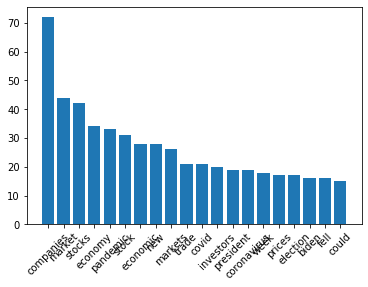

<Figure size 432x288 with 0 Axes>

In [173]:
import matplotlib.pyplot as plt

plt.bar(range(len(newdict)), list(newdict.values()), align='center')
plt.xticks(range(len(newdict)), list(newdict.keys()))
plt.xticks(rotation=45)
plt.show()
plt.savefig('commonwords2.png')

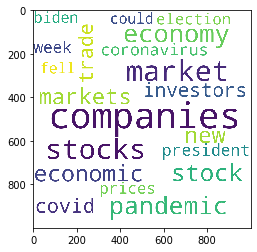

In [162]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wordfreq)
plt.imshow(wc)
plt.savefig('wordcloud.png')